# Demo LoFTR-DS on a single pair of images

This notebook shows how to use the loftr matcher with default config(dual-softmax) and the pretrained weights.

In [1]:
import os
os.chdir("..")
import torch
import cv2
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from src.utils.plotting import make_matching_figure

In [2]:
from src.loftr import LoFTR, default_cfg

# The default config uses dual-softmax.
# The outdoor and indoor models share the same config.
# You can change the default values like thr and coarse_match_type.
matcher = LoFTR(config=default_cfg)
matcher.load_state_dict(torch.load("/home/claudio/Documentos/LoFTR/weights/indoor_ds.ckpt")['state_dict'])
matcher = matcher.eval().cuda()

18
220
19
86
320
552
242
60
1035
65
260
11
14
194
1319
203
536
429
347
286
27
57
27
16
470
45
175
50
24
165
17


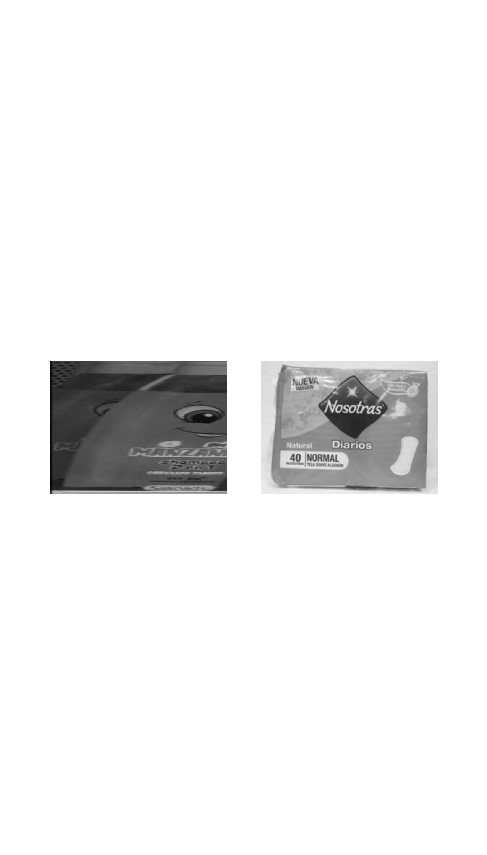

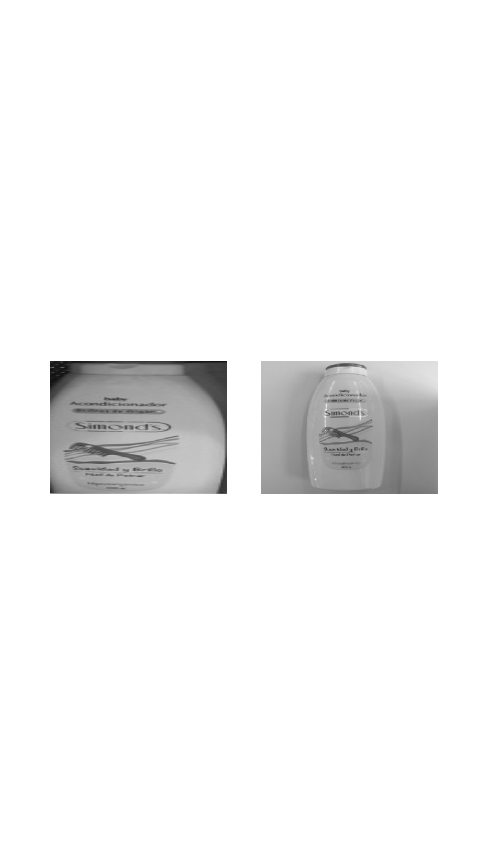

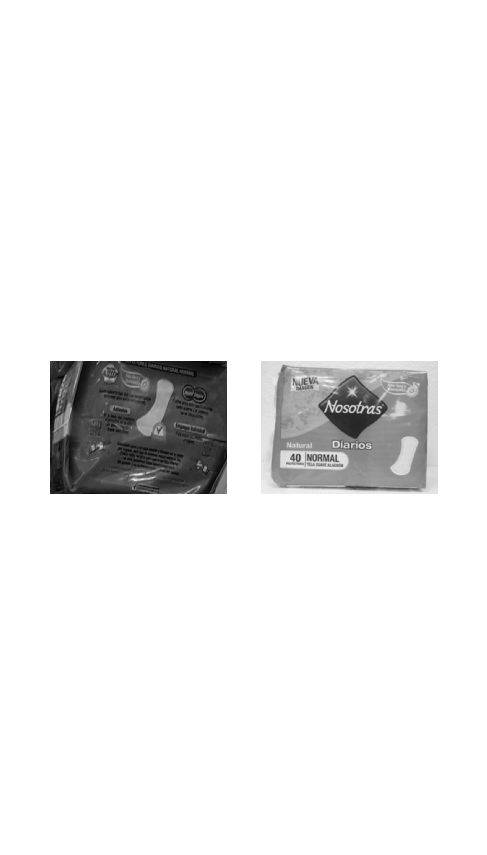

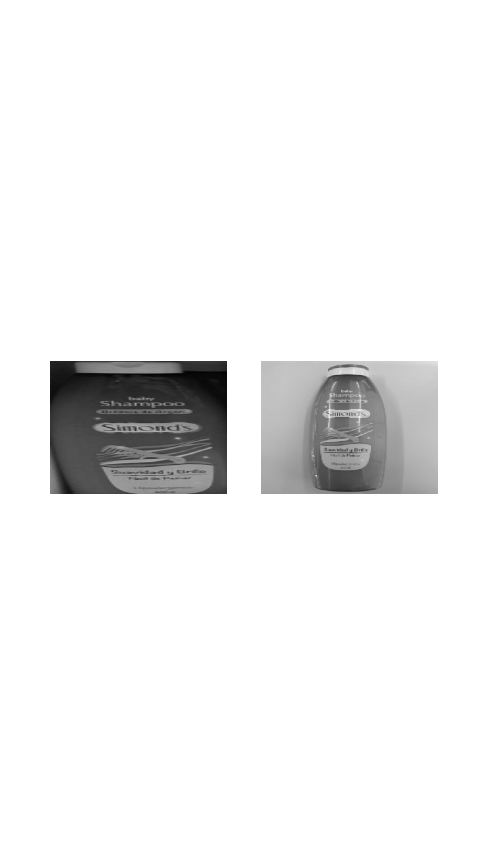

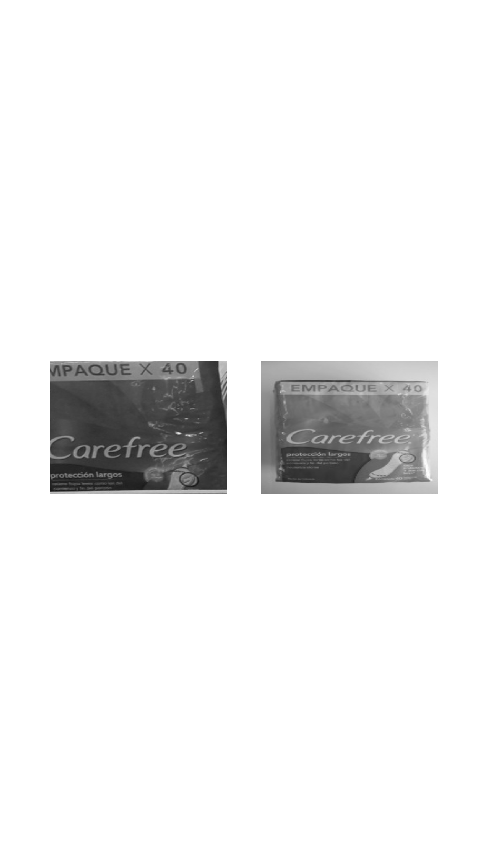

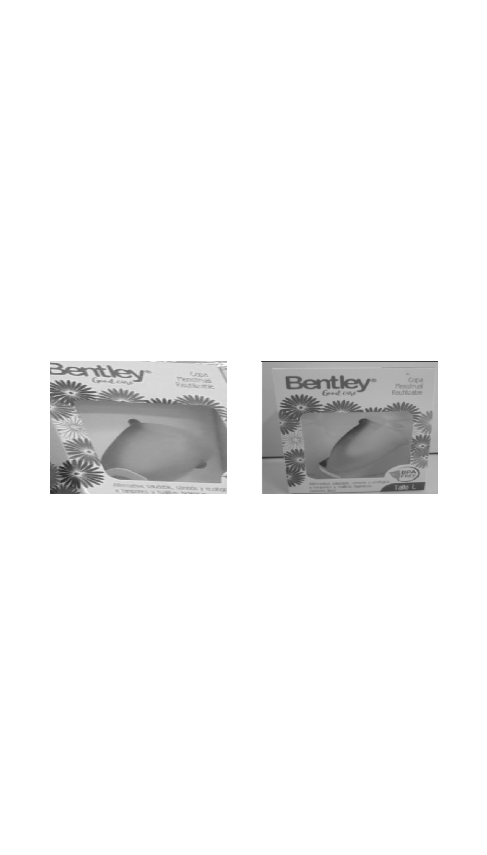

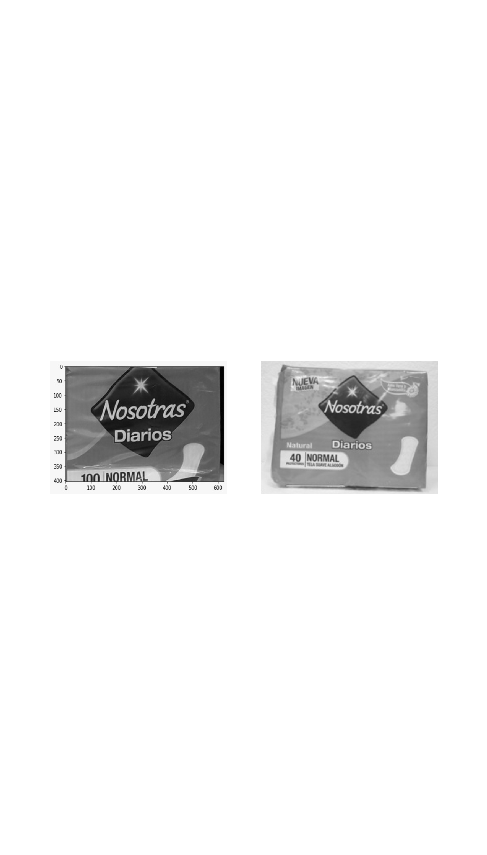

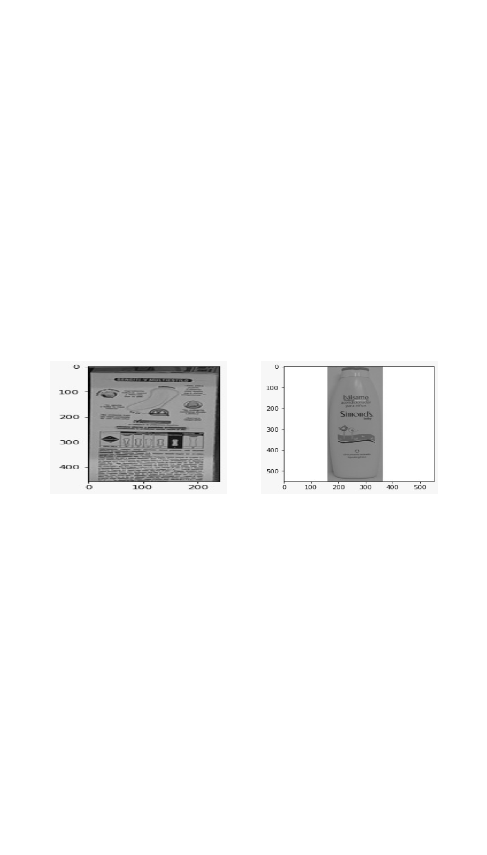

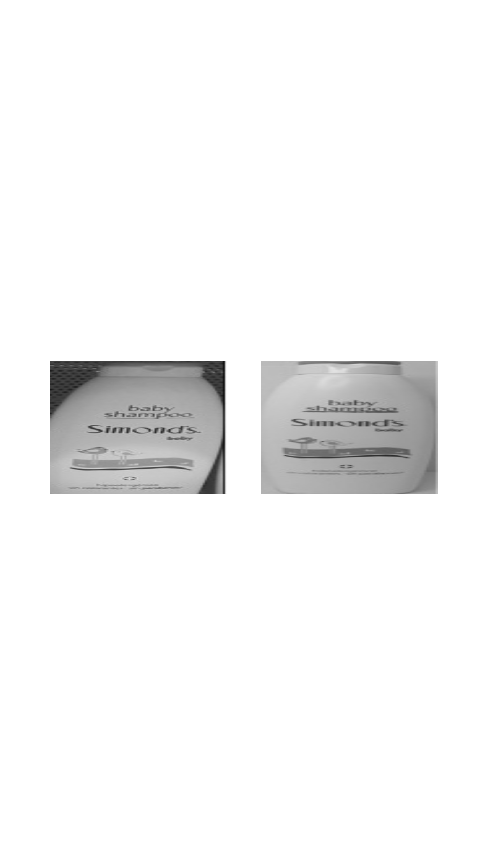

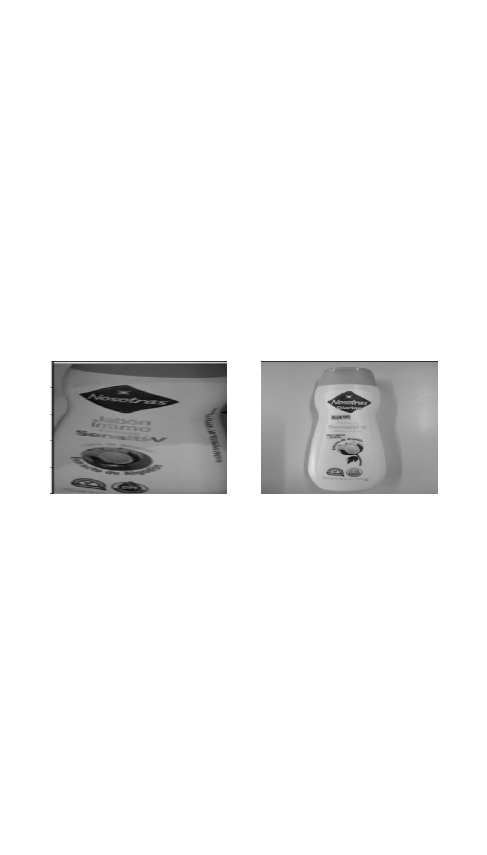

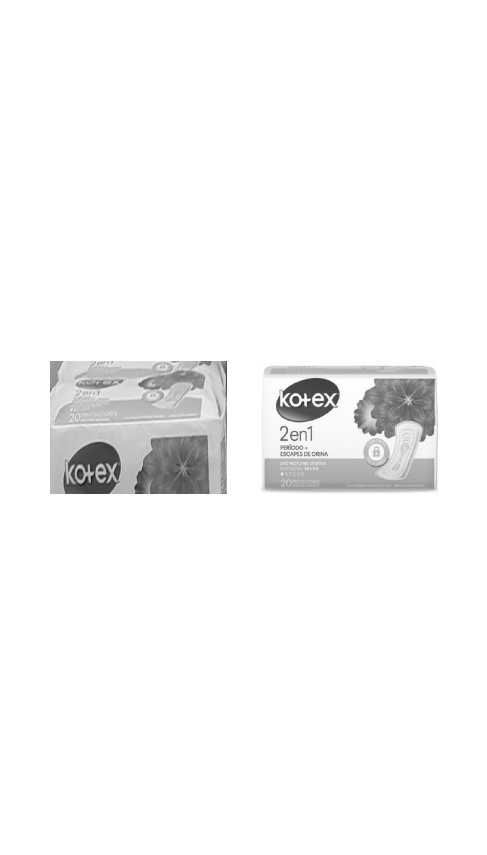

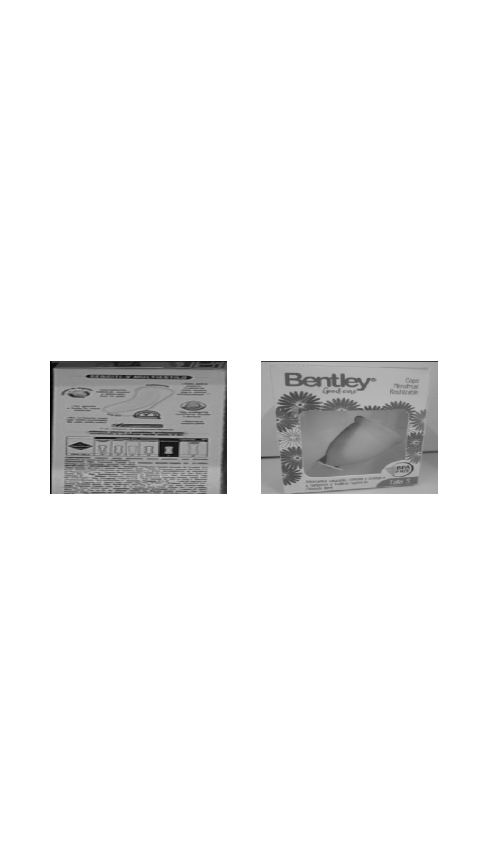

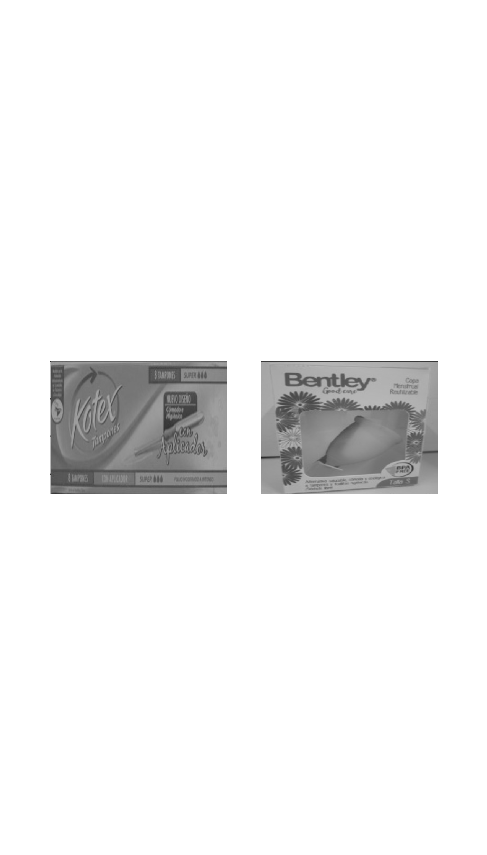

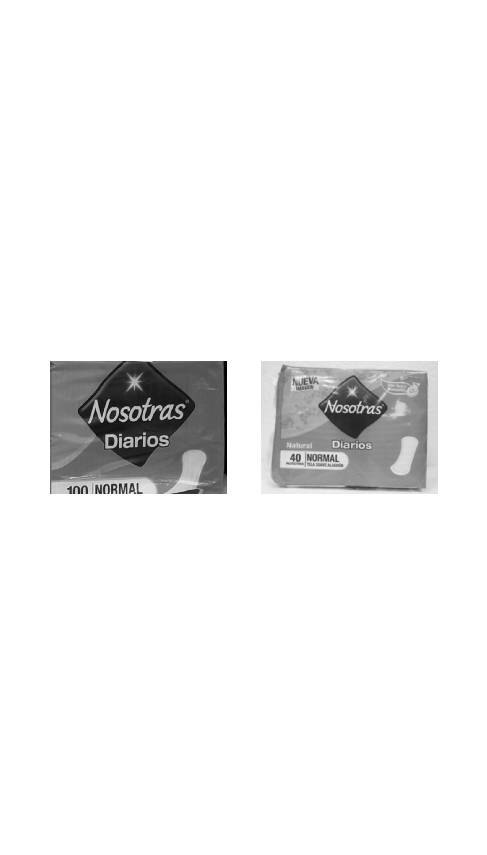

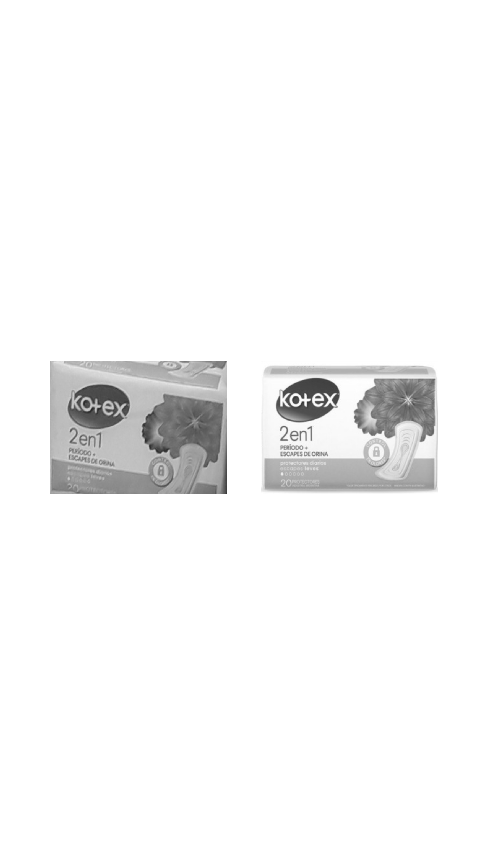

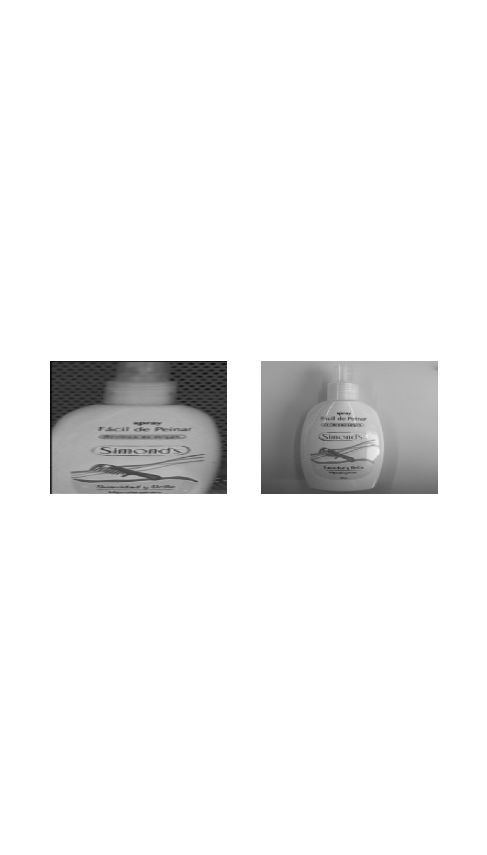

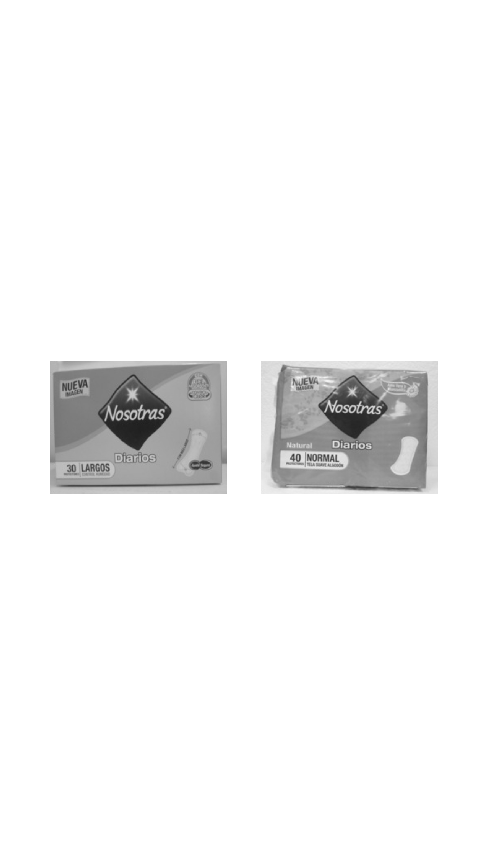

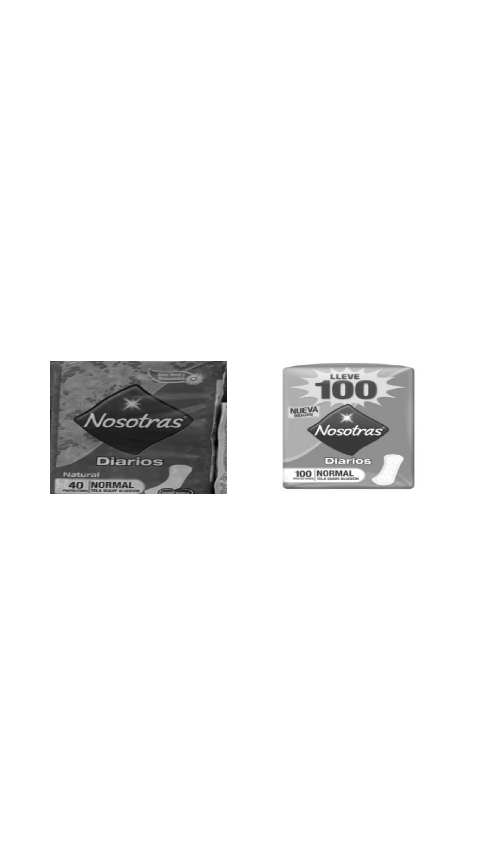

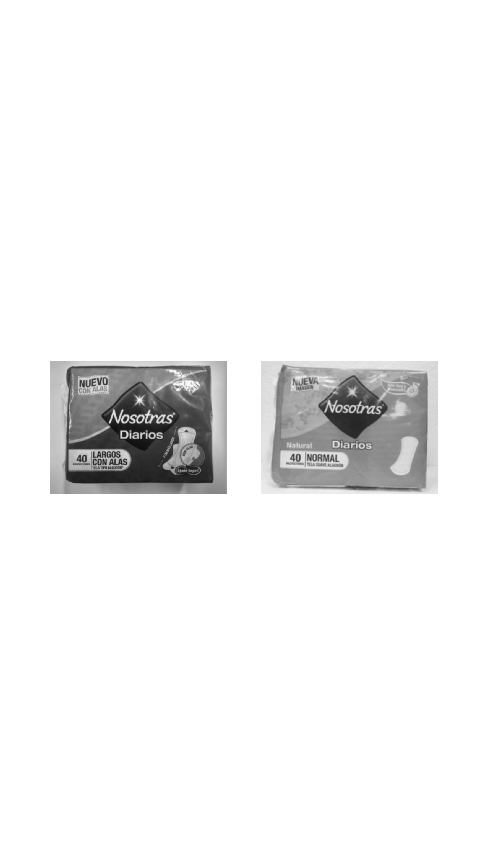

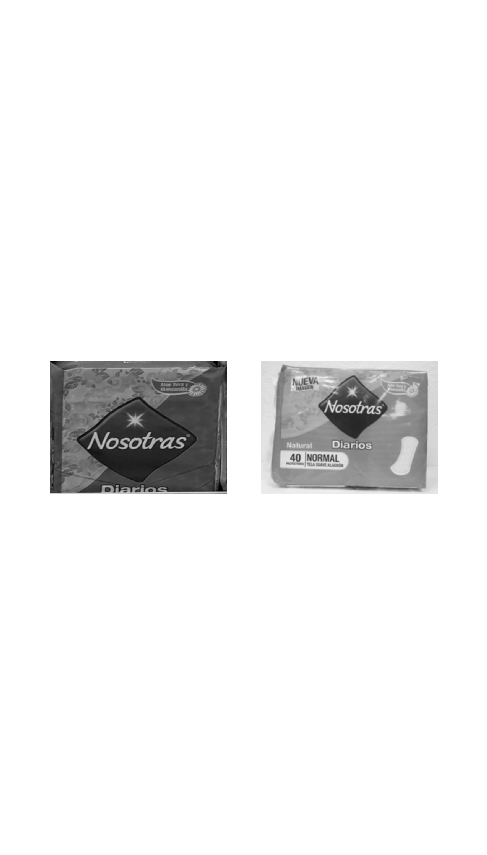

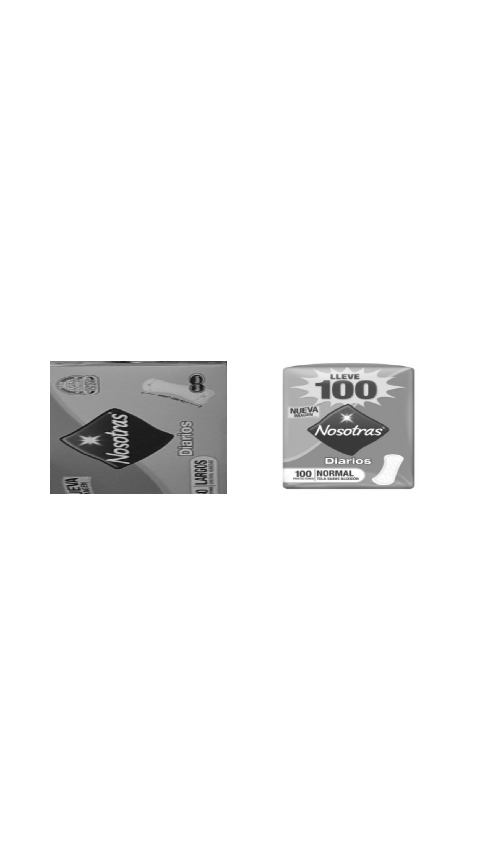

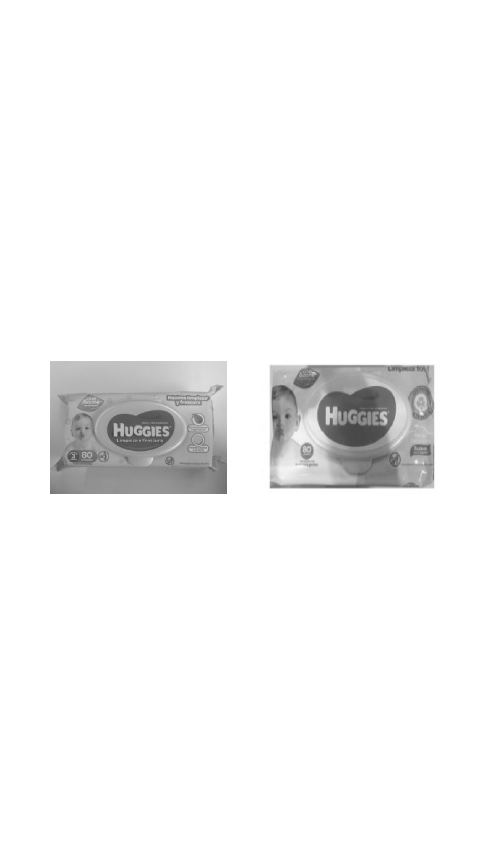

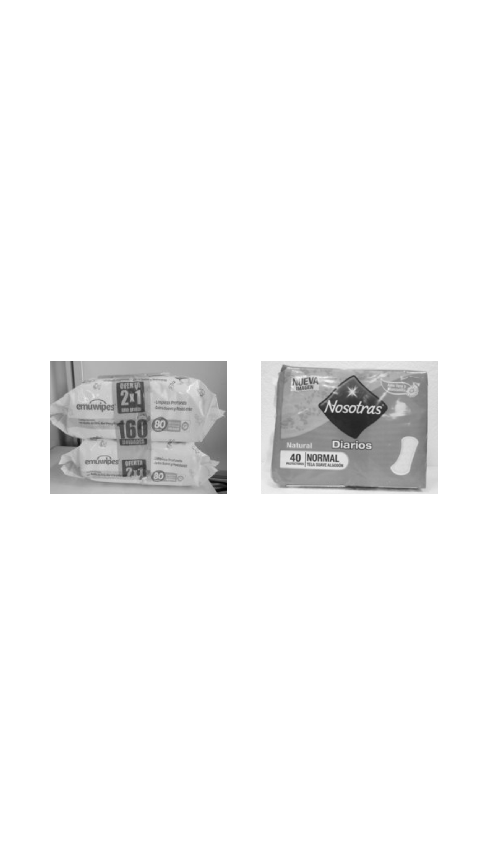

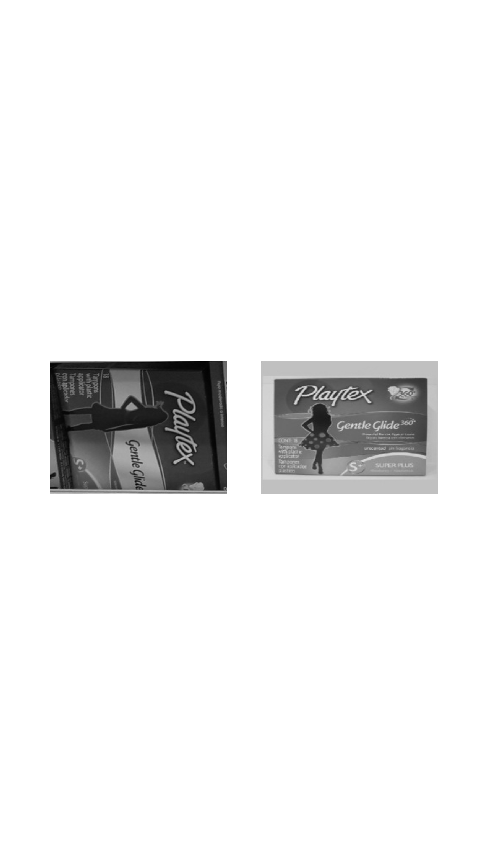

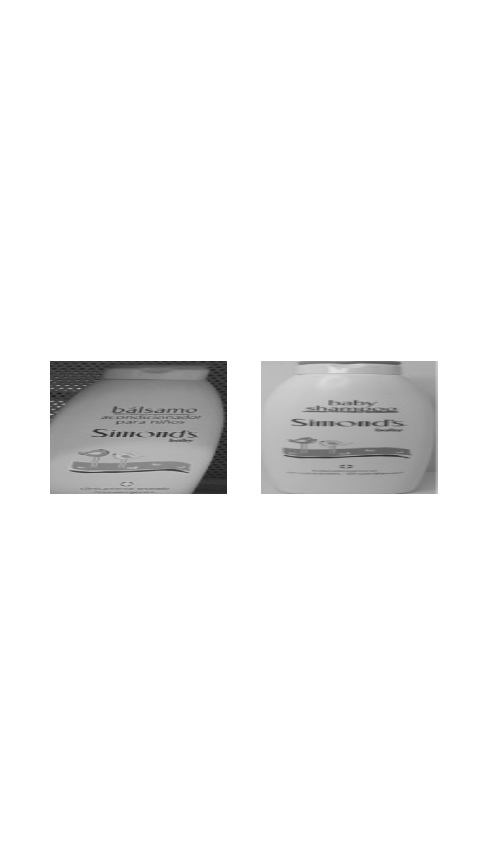

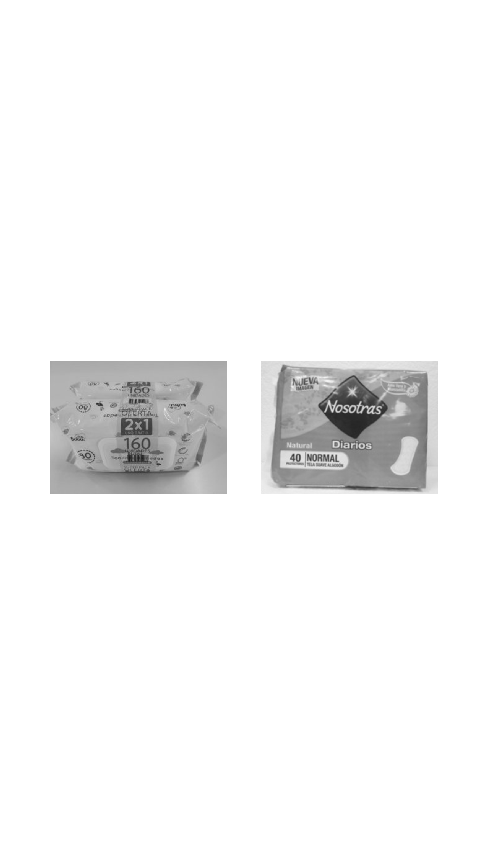

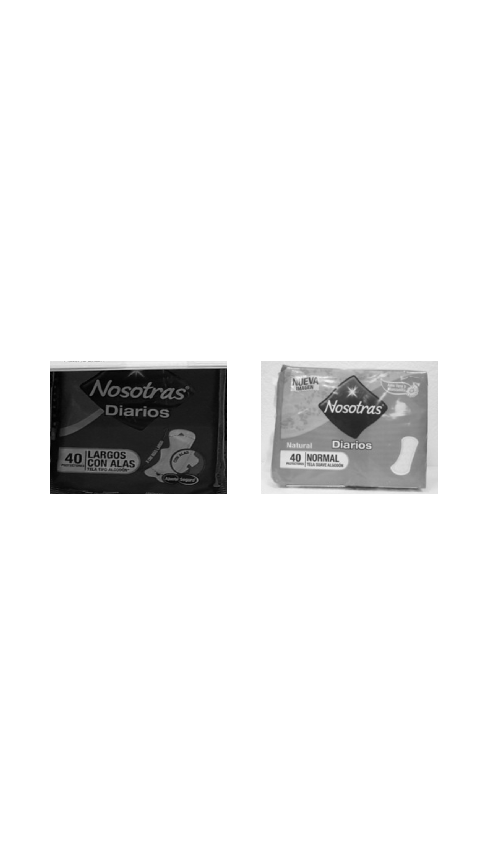

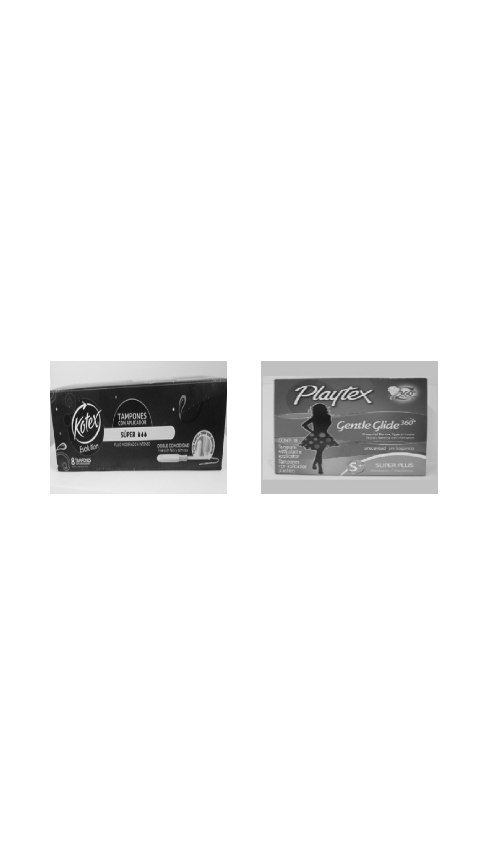

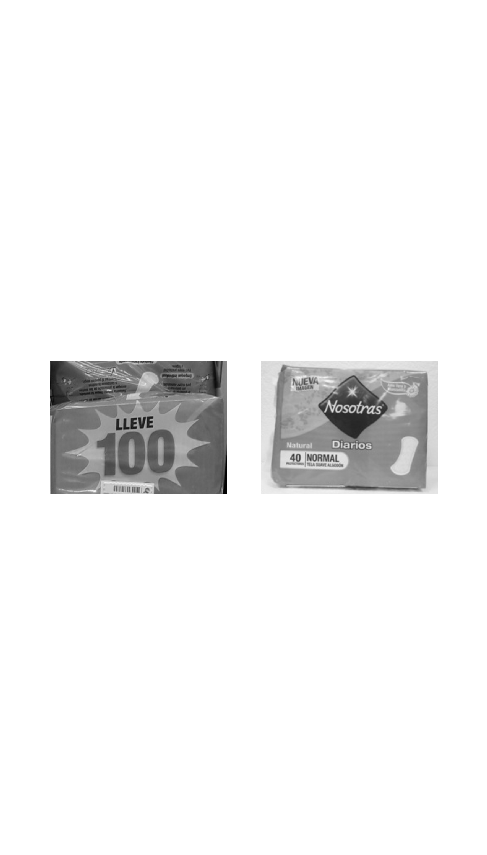

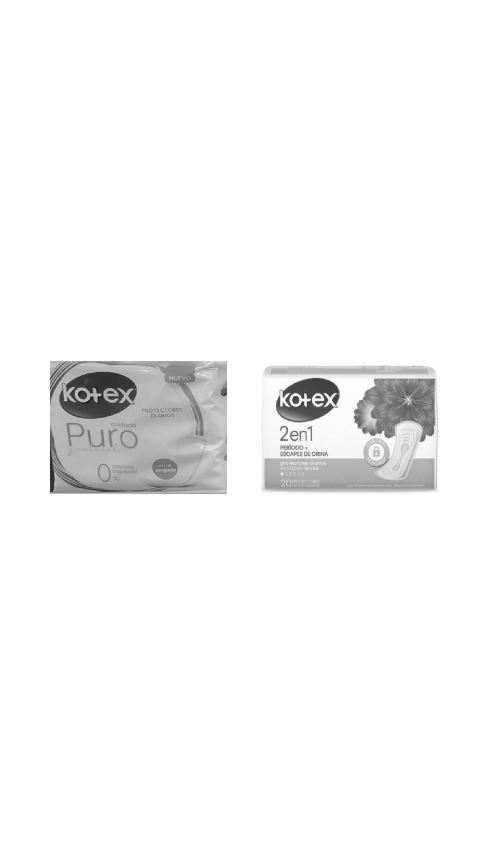

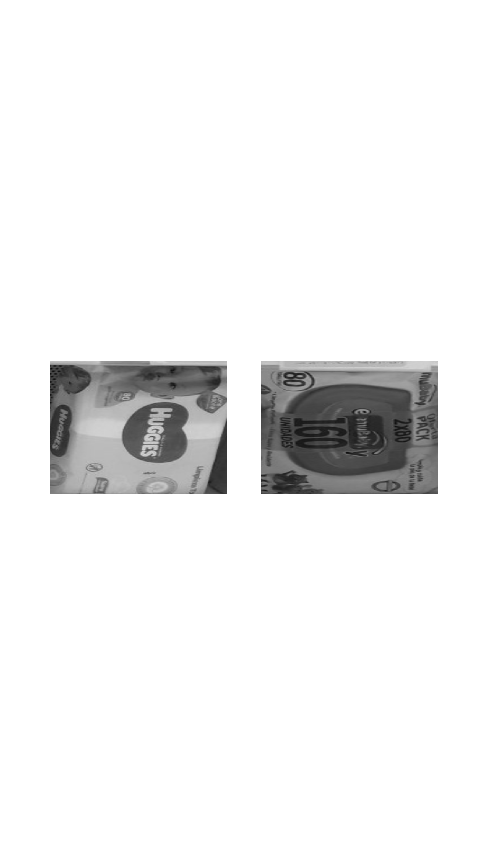

In [4]:
 
path_imagenes_referencia = "/home/claudio/Documentos/LoFTR/imagen_referencia/"
path_imagenes_input = "/home/claudio/Documentos/LoFTR/imagen_input/"

lista_path_imagenes_referencia = os.listdir(path_imagenes_referencia)
lista_path_imagenes_input = os.listdir(path_imagenes_input)
k_max = 0
for path_imagen_input in lista_path_imagenes_input:
    img0_pth = path_imagenes_input + path_imagen_input
    img0_raw = cv2.imread(img0_pth, cv2.IMREAD_GRAYSCALE)
    img0_raw = cv2.resize(img0_raw, (640, 480))
    
    for path_imagen_referencia in lista_path_imagenes_referencia:
        img1_pth = path_imagenes_referencia + path_imagen_referencia
        img1_raw = cv2.imread(img1_pth, cv2.IMREAD_GRAYSCALE)
        img1_raw = cv2.resize(img1_raw, (640, 480))
        img0 = torch.from_numpy(img0_raw)[None][None].cuda() / 255.
        img1 = torch.from_numpy(img1_raw)[None][None].cuda() / 255.
        batch = {'image0': img0, 'image1': img1}

        # Inference with LoFTR and get prediction
        with torch.no_grad():
            matcher(batch)
            k = len(batch['mkpts0_f'])
        
        if k_max < k:
            k_max = k
            image_match = img1_raw 
            path_image_match = img1_pth
            
    my_dpi = 500
    
    if k_max>10:
        print(k_max)
        fig = plt.figure(figsize=(1, 2), dpi=my_dpi)
        plt.axis('off')
        ax0 = fig.add_subplot(1,2,1)
        ax0.set_axis_off()
        ax0.imshow(cv2.cvtColor(img0_raw, cv2.COLOR_BGR2RGB), interpolation='nearest', cmap='gray', vmin=0, vmax=255)
        ax1 = fig.add_subplot(1,2,2)
        ax1.set_axis_off()
        ax1.imshow(cv2.cvtColor(image_match, cv2.COLOR_BGR2RGB), interpolation='nearest', cmap='gray', vmin=0, vmax=255)

        k_max = 0
